In [3]:
import numpy as np
from cv2 import imread,imwrite, dilate, erode
from cv2 import cvtColor, COLOR_BGR2HLS, calcHist
import cv2 as cv
import random
from matplotlib import pyplot as plt
from skimage.measure import label

In [4]:
img = imread('inputs/coins.jpg')

# 2.1.1 Segmentierung

In [16]:
def segment_util(img):
    """
    Given an input image, output the segmentation result
    Input:  
        img:        n x m x 3, values are within [0,255]
    Output:
        img_seg:    n x m
    """
    b,g,r = cv.split(img)
    rgb_img = cv.merge([r,g,b])
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    # thresholding
    ret, thresh = cv.threshold(gray, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)
    
    kernel = np.ones((3, 3), np.uint8)

    # closing
    dilate_img = cv.dilate(thresh, kernel, iterations=5)
    erode_image = cv.erode(dilate_img, kernel, cv.BORDER_REFLECT) 
    
    img_seg = erode_image
    plt.imshow(thresh)

    return thresh

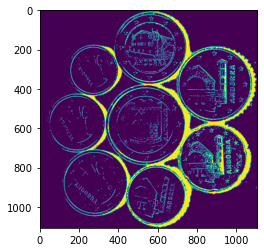

In [17]:
t = segment_util(img)

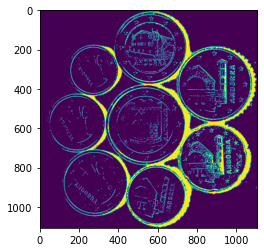

In [18]:
plt.imshow(t)

In [6]:
def opening(img_gray):
    # Creating kernel
    kernel = np.ones((3, 3), np.uint8)

    # Using cv2.erode() method 
    image = cv.erode(img_gray, kernel, cv.BORDER_REFLECT) 
    dilate_img = cv.dilate(image, kernel, iterations=5)

    plt.imshow(dilate_img,cmap='gray')
    
    return dilate_img

In [7]:
def closing(img_gray):
    kernel = np.ones([3, 3], np.uint8)

    # Using cv2.erode() method 
    dilate_img = cv.dilate(img_gray, kernel, iterations=5)
    erode_image = cv.erode(dilate_img, kernel, cv.BORDER_REFLECT) 

    plt.imshow(erode_image,cmap='gray')
    
    return erode_image

### Segmentation nach https://www.askpython.com/python/examples/image-segmentation

In [442]:
img = imread('inputs/coins.jpg')
b,g,r = cv.split(img)
rgb_img = cv.merge([r,g,b])
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

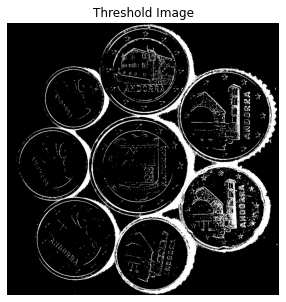

In [443]:
ret, thresh = cv.threshold(gray, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)
plt.figure(figsize=(5,5))
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()

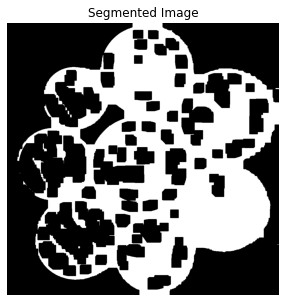

In [446]:
kernel = np.ones((3, 3), np.uint8)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE,kernel, iterations = 15)
bg = cv.dilate(closing, kernel, iterations = 1)
dist_transform = cv.distanceTransform(closing, cv.DIST_L2, 0)
ret, fg = cv.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
cv.imshow('image', fg)
plt.figure(figsize=(5,5))
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()

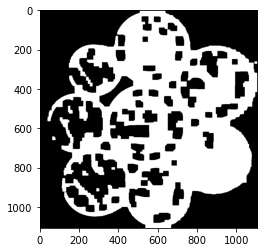

In [447]:
o2 = opening(fg)

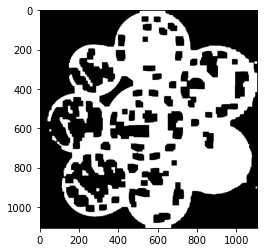

In [448]:
dilate_img = cv.dilate(fg, kernel, iterations=5)
erode_image = cv.erode(dilate_img, kernel, cv.BORDER_REFLECT) 
plt.imshow(erode_image,cmap='gray')

### thresholding

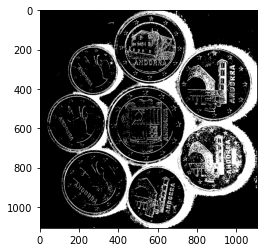

In [449]:
img = imread('inputs/coins.jpg')
b,g,r = cv.split(img)
rgb_img = cv.merge([r,g,b])
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

def thresholding(rgb):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    a = np.histogram(gray.ravel())

    biggest = np.where(a[0] == (np.partition(a[0].flatten(),-2)[-1]))[0][0]
    sec_biggest = np.where(a[0] == (np.partition(a[0].flatten(),-2)[-2]))[0][0]

    threshold = np.mean([a[1][biggest],a[1][sec_biggest]])

    b = gray < int(threshold)
    
    return b

img_thresh = thresholding(rgb_img)
plt.imshow(img_thresh,cmap='gray')

In [450]:
opening(img_thresh)

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'erode'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


### kmeans

In [451]:
img = imread('inputs/coins.jpg')

In [452]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

In [453]:
img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
twoDimage = img_RGB.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [454]:
ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [455]:
b,g,r = cv.split(result_image)
gray_kmeans = cv.cvtColor(result_image,cv.COLOR_BGR2GRAY)
img_kmeans = gray_kmeans < np.mean(np.unique(gray))

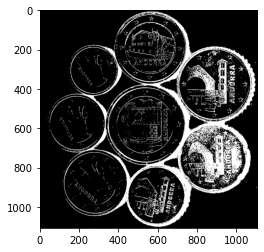

In [456]:
plt.imshow(img_kmeans,cmap='gray')

array([[168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       ...,
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168],
       [168, 168, 168, ..., 168, 168, 168]], dtype=uint8)

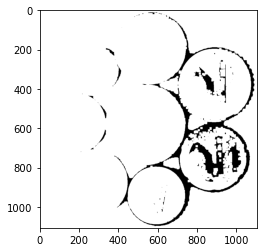

In [457]:
opening(gray_kmeans)

### Contour detection

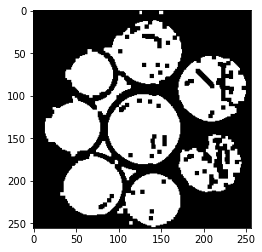

In [32]:
img = imread('inputs/coins.jpg')
img = cv.resize(img,(256,256))

# all together:
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)
edges = cv.dilate(cv.Canny(thresh,0,255),None)

kernel = np.ones([2, 2], np.uint8)

erode_image = cv.erode(edges, kernel, cv.BORDER_REFLECT,iterations=2)

opening = cv.morphologyEx(erode_image, cv.MORPH_OPEN, kernel)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(dilate_img, cv.MORPH_CLOSE, kernel)

cnt = sorted(cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv.drawContours(mask, [cnt],-1, 255, -1)

dst = cv.bitwise_and(img, img, mask=mask)
segmented = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
seg_gray = cv.cvtColor(segmented,cv.COLOR_BGR2GRAY)
img_seg = seg_gray > 10

ret, thresh = cv.threshold(seg_gray, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

kernel = np.ones([2, 2], np.uint8)

erode_image = cv.erode(thresh, kernel, cv.BORDER_REFLECT,iterations=2)
#ret, thresh = cv.threshold(erode_image, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

opening = cv.morphologyEx(erode_image, cv.MORPH_OPEN, kernel = np.ones([3,3], np.uint8),iterations=3)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel = np.ones([3,3], np.uint8),iterations=1)


plt.imshow(np.invert(erode_image),cmap='gray')

# thresholding
ret, thresh = cv.threshold(closing, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

kernel = np.ones((2, 2), np.uint8)

# closing
erode = cv.erode(thresh, kernel, cv.BORDER_REFLECT,iterations=5)
opening = cv.morphologyEx(erode, cv.MORPH_OPEN, kernel)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(dilate_img, cv.MORPH_CLOSE, kernel)

plt.imshow(closing,cmap='gray')

In [33]:
img = imread('inputs/coins.jpg')
img = cv.resize(img,(256,256))

In [19]:
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)
edges = cv.dilate(cv.Canny(thresh,0,255),None)

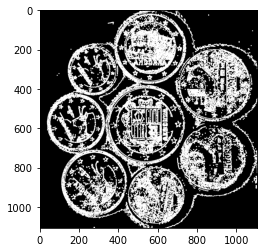

In [20]:
plt.imshow(edges,cmap='gray')

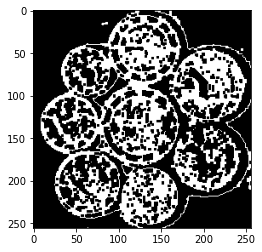

In [14]:
kernel = np.ones([2, 2], np.uint8)

erode_image = cv.erode(edges, kernel, cv.BORDER_REFLECT,iterations=2)

opening = cv.morphologyEx(erode_image, cv.MORPH_OPEN, kernel)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(dilate_img, cv.MORPH_CLOSE, kernel)
# Using cv2.erode() method 
#

plt.imshow(erode_image,cmap='gray')

In [15]:
cnt = sorted(cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv.drawContours(mask, [cnt],-1, 255, -1)

In [16]:
dst = cv.bitwise_and(img, img, mask=mask)
segmented = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
seg_gray = cv.cvtColor(segmented,cv.COLOR_BGR2GRAY)
img_seg = seg_gray > 10

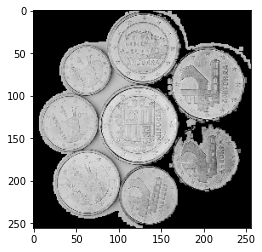

In [17]:
plt.imshow(seg_gray,cmap='gray')

In [571]:
ret, thresh = cv.threshold(seg_gray, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

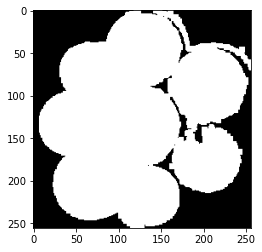

In [581]:
kernel = np.ones([2, 2], np.uint8)

erode_image = cv.erode(thresh, kernel, cv.BORDER_REFLECT,iterations=2)
#ret, thresh = cv.threshold(erode_image, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

opening = cv.morphologyEx(erode_image, cv.MORPH_OPEN, kernel = np.ones([3,3], np.uint8),iterations=3)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel = np.ones([3,3], np.uint8),iterations=1)


plt.imshow(np.invert(erode_image),cmap='gray')

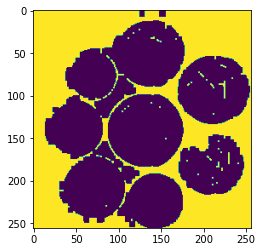

In [524]:
# thresholding
ret, thresh = cv.threshold(closing, 0, 255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

kernel = np.ones((2, 2), np.uint8)

# closing
erode = cv.erode(thresh, kernel, cv.BORDER_REFLECT,iterations=3)
opening = cv.morphologyEx(erode, cv.MORPH_OPEN, kernel)
dilate_img = cv.dilate(opening, kernel, iterations=1)
closing = cv.morphologyEx(dilate_img, cv.MORPH_CLOSE, kernel)


img_seg = erode_image

plt.imshow(erode)

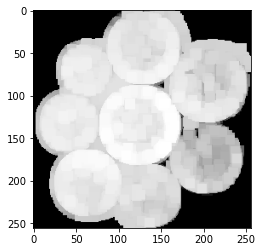

In [425]:
op_seg_gray = opening(seg_gray)

(array([16710.,    91.,    43.,    78.,   222.,   275.,  1529.,  5029.,
        20058., 21501.]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

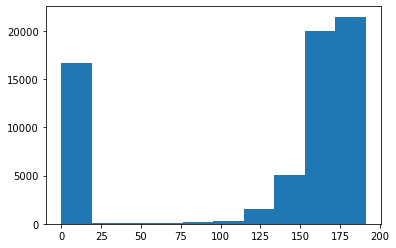

In [431]:
plt.hist(op_seg_gray.ravel())

In [435]:
a = np.histogram(op_seg_gray.ravel())

biggest = np.where(a[0] == (np.partition(a[0].flatten(),-2)[-1]))[0][0]
sec_biggest = np.where(a[0] == (np.partition(a[0].flatten(),-2)[-2]))[0][0]

threshold = np.mean([a[1][biggest],a[1][sec_biggest]])

b = op_seg_gray < int(threshold)

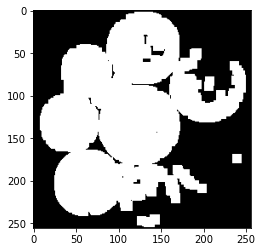

In [437]:
plt.imshow(np.invert(b),cmap='gray')

### Color masking

In [273]:
img = imread('inputs/coins.jpg')
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)

light_blue = (90, 70, 50)
dark_blue = (128, 255, 255)
# You can use the following values for green
# light_green = (40, 40, 40)
# dark_greek = (70, 255, 255)
mask = cv.inRange(hsv_img, light_blue, dark_blue)

result = cv.bitwise_and(img, img, mask=mask)

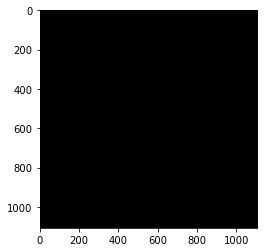

In [274]:
plt.imshow(result)

In [284]:
img = imread('inputs/coins.jpg')
b,g,r = cv.split(img)
b_hist, g_hist,r_hist = np.histogram(b.ravel()),np.histogram(g.ravel()),np.histogram(r.ravel())


In [285]:
b_hist

(array([ 18408,  28296,  61982,  90398, 131959, 156951, 290804, 414288,
         32162,    201]),
 array([  0. ,  22.6,  45.2,  67.8,  90.4, 113. , 135.6, 158.2, 180.8,
        203.4, 226. ]))

In [288]:
b_big = b_hist[1][np.where(b_hist[0] == (np.partition(b_hist[0].flatten(),-2)[-1]))[0][0]]
g_big = g_hist[1][np.where(g_hist[0] == (np.partition(g_hist[0].flatten(),-2)[-1]))[0][0]]
r_big = r_hist[1][np.where(r_hist[0] == (np.partition(r_hist[0].flatten(),-2)[-1]))[0][0]]

In [289]:
light = (b_big-10,g_big-10,r_big-10)
dark = (b_big+10,g_big+10,r_big+10)

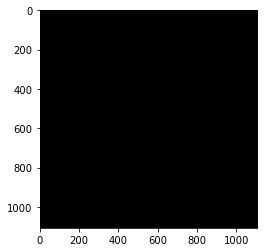

In [290]:
mask = cv.inRange(hsv_img, light_blue, dark_blue)
result = cv.bitwise_and(img, img, mask=mask)
plt.imshow(result)

# 2.1.2 Schliessen der Löcher innerhalb der Münzen

In [4]:
img = imread('inputs/coins_seg.png')

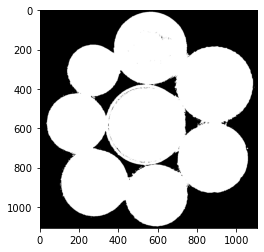

In [5]:
plt.imshow(img)

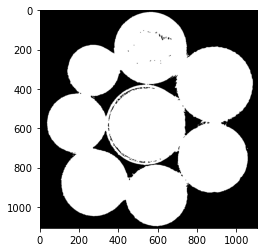

In [6]:
kernel=np.ones([3, 3], np.uint8)
erode_image = cv.erode(img, kernel, cv.BORDER_REFLECT) 

plt.imshow(erode_image)

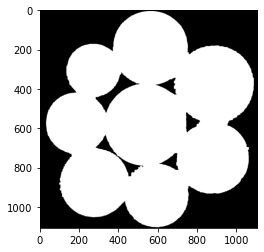

In [7]:
dilate_img = cv.dilate(erode_image, kernel, iterations=5)
plt.imshow(dilate_img)

# 2.1.3 Instanzsegmentierung von Münzen

In [8]:
img = dilate_img
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [9]:
# Codeparts from: https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

kernel=np.ones([3, 3], np.uint8)

# sure background area
sure_bg = cv.dilate(img_gray,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(img_gray,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.4*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

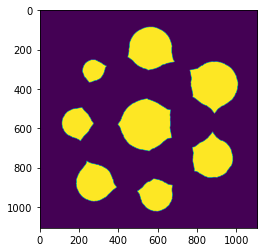

In [10]:
plt.imshow(sure_fg)

In [11]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

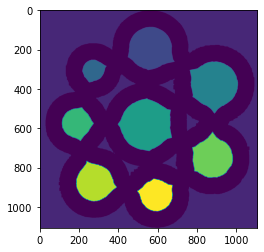

In [12]:
plt.imshow(markers)

In [43]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

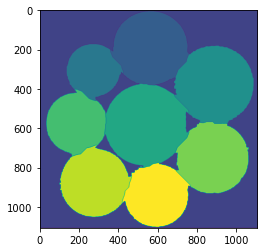

In [44]:
plt.imshow(markers)

In [45]:
rgb_list = []
for i in range(np.histogram(markers.ravel())[1].shape[0]):
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    rgb = [r,g,b]
    rgb_list.append(rgb)

In [46]:
np.zeros((markers.shape[0],markers.shape[0],3)).shape

(1107, 1107, 3)

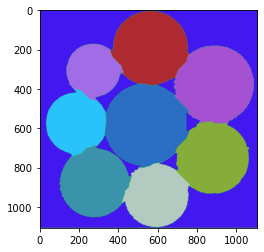

In [47]:
img2 = np.zeros_like(img)

for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        img2[i,j,0] = rgb_list[markers[i][j]][0]
        img2[i,j,1] = rgb_list[markers[i][j]][1]
        img2[i,j,2] = rgb_list[markers[i][j]][2]
plt.imshow(img2)

# 2.2 Buchstaben-Erkennung

In [83]:
text = imread('inputs/text_dil_er.png')
m = imread('inputs/text_m_inv.png')

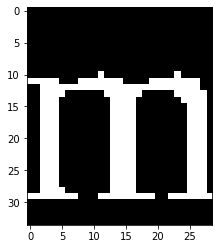

In [84]:
plt.imshow(m)

In [85]:
thinned = cv.ximgproc.thinning(cv.cvtColor(m, cv.COLOR_RGB2GRAY))

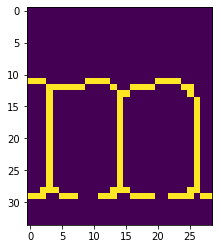

In [86]:
plt.imshow(thinned)

In [90]:
from tqdm import tqdm

In [107]:
text = cv.cvtColor(text, cv.COLOR_BGR2GRAY)
m = cv.cvtColor(m, cv.COLOR_BGR2GRAY)

In [108]:
gray.shape

(401, 821)

In [109]:
m.shape

(34, 29)

In [147]:
a = []
b = []
for x in tqdm(range(0,300)):
    for y in range(text.shape[1]-m.shape[1]):
        z = np.zeros_like(m)
        for i in range(m.shape[0]):
            for j in range(m.shape[1]):
                #print('x,y:',x,y,'i,j',i,j)
                z[i,j] = text[x+i,y+j] == m[i,j]
        uniques, counts = np.unique(z, return_counts=True)
        if uniques.shape[0]==1 & uniques[0] == 1:
            a.append([x,y])
            b.append(z)
        elif counts.shape[0]!=1:
            if counts[1] > 0.5*np.sum(counts):
                a.append([x,y])
                b.append(z)

100%|█████████████████████████████████████████| 300/300 [01:55<00:00,  2.60it/s]


In [148]:
a

[]

In [123]:
n = np.zeros_like(text)

In [124]:
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        n[11+i,595+j] == text[11+i,595+j]

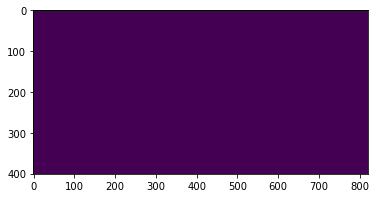

In [125]:
plt.imshow(n)